In [ ]:
#!python3 -m pip install torch
#!python3 -m pip install matplotlib
#!python3 -m pip install numpy

# Neural Network basics

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Some work with tensors

## Creating a tensor

In [4]:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [5]:
torch.zeros([2,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

## Specifying device and type

In [6]:
#device = torch.device('cuda:0')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

torch.ones([2, 4], dtype=torch.float64, device=device)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

# Operations with tensors

In [7]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.tensor([[1., -1.], [-1., 1.]])

## Sum()

In [8]:
print('Sum of elements in x:\n', x.sum())

Sum of elements in x:
 tensor(10.)


## Item()

In [9]:
print('Sum of elements in y:\n', y.sum().item())

Sum of elements in y:
 0.0


## torch.add()

In [10]:
print('Adding one tensor to another:\n', torch.add(x,y))

Adding one tensor to another:
 tensor([[2., 1.],
        [2., 5.]])


## torch.mul()

In [11]:
print('Multiplying one tensor with the other one:\n', torch.mul(x,y))

Multiplying one tensor with the other one:
 tensor([[ 1., -2.],
        [-3.,  4.]])


## t() (transpose) and torch.matmul()

In [12]:
input_shape = 3
weights = torch.rand([input_shape])
#weights = torch.tensor([1., -1., 1.])
print('weights', weights)

inp = torch.tensor([1., -1., 1.]).t()
print('input', inp)

torch.matmul(weights, inp)

weights tensor([0.4495, 0.2359, 0.5454])
input tensor([ 1., -1.,  1.])


tensor(0.7591)

# torch.cat()

In [13]:
torch.cat((weights, torch.tensor([0.5])), 0)

tensor([0.4495, 0.2359, 0.5454, 0.5000])

# Neuron model

<img src="img/neuron.png" width=1000>

## Threshold_function


$$\begin{equation}
        \begin{matrix}
        f(x) & =
        & \left\{
        \begin{matrix}
        1 & \mbox{if } x \geq threshold \\
        0 & \mbox{if } x \lt threshold
        \end{matrix} \right.
        \end{matrix}
    \end{equation}$$

In [14]:
def threshold_function(x, threshold=0):
    return 0 if x < threshold else 1

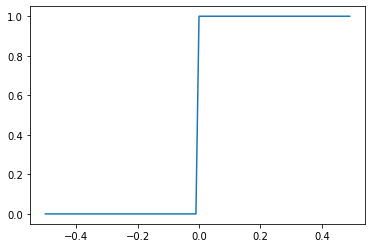

In [15]:
inp = [x*0.01 - 0.5 for x in range(100)]
plt.plot(inp, [threshold_function(x, threshold=0) for x in inp])

## Neuron model

In [23]:
class Neuron(object):
    def __init__(self, input_shape=None, weights: torch.Tensor=None, activation_function=None, debug=False):
        
        assert input_shape is not None or weights is not None
        if weights is not None:
            self.weights = weights
        else:
            self.weights = torch.rand([input_shape, 1])
            
        self.activation_function = activation_function
        self.debug = debug
        
    def agregate_signal(self, input_tensor):
        if self.debug:
            print('Input_tensor:\n', input_tensor)
            print(f'Multiplying:{self.weights} * {input_tensor}')
        m = torch.mul(self.weights, input_tensor)
        if self.debug:
            print(f'Result:\n{m}')
        s = m.sum()
        if self.debug:
            print(f'Sum:\n{s}')
        output = s.item()
        if self.debug:
            print('Output without activation:\n', output)
        return output
        
    def activation(self, input_value):
        if self.activation_function is not None:
            output = self.activation_function(input_value)
        else:
            output = input_value
        if self.debug:
            print('Output after activation:\n', output)
        return output

    def forward(self, input_tensor):
        output = self.agregate_signal(input_tensor)
        output = self.activation(output)
        return output

# Linearly separable classes

## Dataset

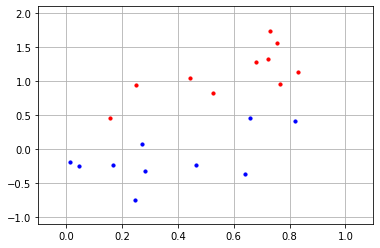

In [17]:
N = 10

C0_x0 = np.random.random(N)
C0_x1 = (C0_x0 + [np.random.randint(10)/10 for i in range(N)] + 0.1)
C0 = np.array([(C0_x0[i], C0_x1[i]) for i in range(len(C0_x0))])

C1_x0 = np.random.random(N)
C1_x1 = (C1_x0 - [np.random.randint(10)/10 for i in range(N)] - 0.1)
C1 = np.array([(C1_x0[i], C1_x1[i]) for i in range(len(C1_x0))])

# plotting
plt.scatter(C0_x0, C0_x1, s=10, c='red')
plt.scatter(C1_x0, C1_x1, s=10, c='blue')
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1])
plt.grid(True)

## Classification

$$\begin{equation}
        \begin{matrix}
        \left\{
        \begin{matrix}
        w_0 x_0 + w_1 x_1 \geq 0 & \mbox{C0 (red)} \\
        w_0 x_0 + w_1 x_1 \lt 0 & \mbox{C1 (blue)}
        \end{matrix} \right.
        \end{matrix}
    \end{equation}$$

$$w_0 x_0 + w_1 x_1 = 0$$

$$x_1 = - w_0 / w_1 * x_0$$

$$ k = - w_0 / w_1$$

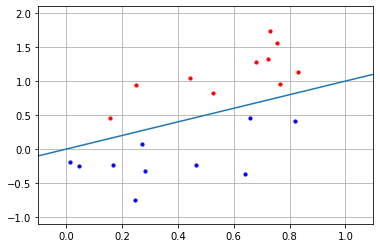

In [21]:
w0 = -1
w1 = 1

wf_x0 = [-1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) for x0 in wf_x0]

# plotting
plt.plot(wf_x0, wf_x1)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1])
plt.scatter(C0_x0, C0_x1, s=10, c='red')
plt.scatter(C1_x0, C1_x1, s=10, c='blue')

Input_tensor:
 tensor([0, 1])
Multiplying:tensor([-1,  1]) * tensor([0, 1])
Result:
tensor([0, 1])
Sum:
1
Output without activation:
 1
Output after activation:
 1
Class C0 (Red)


(-1.1, 2.1)

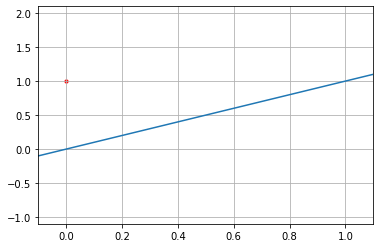

In [25]:
weights = torch.tensor([w0, w1])
nn = Neuron(weights=weights, activation_function=threshold_function, debug=True)

x = [0, 1]

out = nn.forward(torch.tensor(x))

# plotting
if out >= 0.5:
    print("Class C0 (Red)")
    plt.scatter(x[0], x[1], s=10, c='red')

else:
    print("Class C1 (Blue)")
    plt.scatter(x[0], x[1], s=10, c='blue')

plt.plot(wf_x0, wf_x1)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1])

# Bias

## Dataset

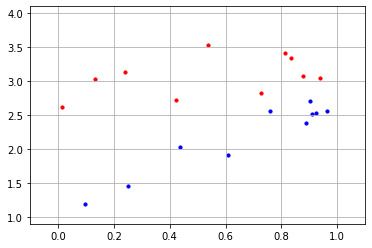

In [26]:
N = 10
b = 2

C0_x0 = np.random.random(N)
C0_x1 = (C0_x0 + [np.random.randint(10)/10 for i in range(N)] + 0.1 + b)
C0 = np.array([(C0_x0[i], C0_x1[i]) for i in range(len(C0_x0))])

C1_x0 = np.random.random(N)
C1_x1 = (C1_x0 - [np.random.randint(10)/10 for i in range(N)] - 0.1 + b)
C1 = np.array([(C1_x0[i], C1_x1[i]) for i in range(len(C1_x0))])

# plotting
plt.scatter(C0_x0, C0_x1, s=10, c='red')
plt.scatter(C1_x0, C1_x1, s=10, c='blue')
plt.xlim([-0.1,1.1])
plt.ylim([-1.1+b,2.1+b])
plt.grid(True)

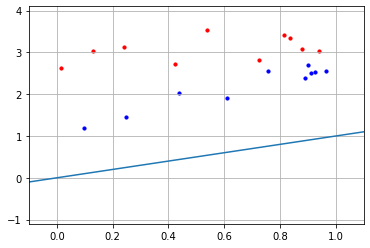

In [30]:
w0 = -1
w1 = 1

wf_x0 = [-1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) for x0 in wf_x0]

# plotting
plt.plot(wf_x0, wf_x1)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1+b])
plt.scatter(C0_x0, C0_x1, s=10, c='red')
plt.scatter(C1_x0, C1_x1, s=10, c='blue')

$$\begin{equation}
        \begin{matrix}
        \left\{
        \begin{matrix}
        w_0 x_0 + w_1 x_1 + bias \geq 0 & \mbox{C0 (red)} \\
        w_0 x_0 + w_1 x_1 + bias \lt 0 & \mbox{C1 (blue)}
        \end{matrix} \right.
        \end{matrix}
    \end{equation}$$

$$w_0 x_0 + w_1 x_1 + bias = 0$$

$$x_1 = - w_0 / w_1 * x_0 - bias/w_1 $$

$$ k = - w_0 / w_1, b = - bias / w_1$$

<img src="img/neuron_bias.png" width=1000>

In [31]:
class BiasNeuron(Neuron):
    def __init__(self, input_shape=None, weights: torch.Tensor=None, bias=None, activation_function=None,
                     debug=False):
        super().__init__(input_shape, weights, activation_function, debug)
        
        if bias is not None:
            self.bias = bias
        

    def forward(self, input_tensor):
        output = self.agregate_signal(input_tensor)
        
        output = output + self.bias
        
        output = self.activation(output)
        return output

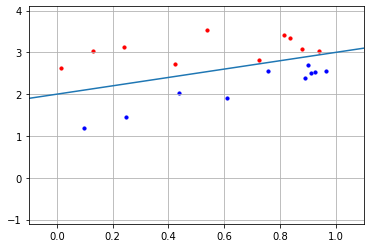

In [40]:
w0 = -0.5
w1 = 0.5
b = 2.

bias = -b * w1

wf_x0 = [-1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) + b for x0 in wf_x0]

# plotting
plt.plot(wf_x0, wf_x1)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1+b])
plt.scatter(C0_x0, C0_x1, s=10, c='red')
plt.scatter(C1_x0, C1_x1, s=10, c='blue')

Input_tensor:
 tensor([0, 1])
Multiplying:tensor([-0.5000,  0.5000]) * tensor([0, 1])
Result:
tensor([-0.0000, 0.5000])
Sum:
0.5
Output without activation:
 0.5
Output after activation:
 -0.5
Class C1(Blue)


(-1.1, 4.1)

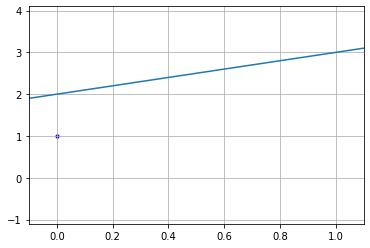

In [42]:
weights = torch.tensor([w0, w1])
nn = BiasNeuron(weights=weights, bias=bias, debug=True)

x = [0, 1]

out = nn.forward(torch.tensor(x))

# plotting
if out >= 0.5:
    print("Class C0 (Red)")
    plt.scatter(x[0], x[1], s=10, c='red')

else:
    print("Class C1(Blue)")
    plt.scatter(x[0], x[1], s=10, c='blue')

plt.plot(wf_x0, wf_x1)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-1.1,2.1+b])

# XOR

(-0.1, 1.1)

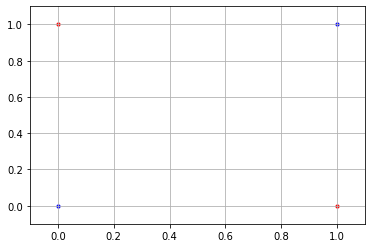

In [43]:
C0 = np.array([(0,1), (1,0)])

C1 = np.array([(0,0), (1,1)])


# plotting
plt.scatter([C0[i][0] for i in range(len(C0))],
            [C0[i][1] for i in range(len(C0))], s=10, c='red')
plt.scatter([C1[i][0] for i in range(len(C1))],
            [C1[i][1] for i in range(len(C1))], s=10, c='blue')
#plt.plot(f)
plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

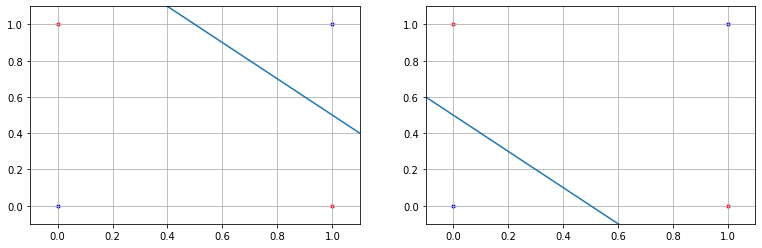

In [44]:
w0 = 1
w1 = 1
b = 1.5

bias = -b * w1 

C0 = np.array([(0,1), (1,0)])

C1 = np.array([(0,0), (1,1)])

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(13)

wf_x0 = [-2, -1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) + 1.5 for x0 in wf_x0]
ax1.plot(wf_x0, wf_x1)

wf_x0 = [-2, -1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) + 0.5 for x0 in wf_x0]
ax2.plot(wf_x0, wf_x1)

for ax in [ax1, ax2]:
    ax.scatter([C0[i][0] for i in range(len(C0))],
                [C0[i][1] for i in range(len(C0))], s=10, c='red')
    ax.scatter([C1[i][0] for i in range(len(C1))],
                [C1[i][1] for i in range(len(C1))], s=10, c='blue')

    ax.grid(True)
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])

In [45]:
class Perceptron:
    def __init__(self):
        self.first_layer = []
        self.second_layer = []

    def forward(self, input_tensor):
        first_layer_output = []
        
        for neuron in self.first_layer:
            output = neuron.forward(input_tensor)
            first_layer_output.append(output)
            
        second_layer_input = torch.tensor(first_layer_output)
        
        for neuron in self.second_layer:
            output = neuron.forward(second_layer_input)

        return output

(-0.1, 1.1)

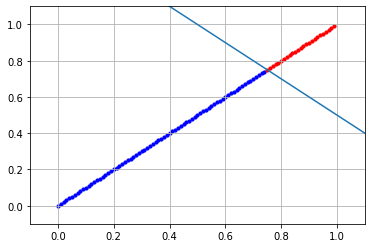

In [47]:
w0 = 1
w1 = 1
b = 1.5

bias = -b * w1

wf_x0 = [-2, -1, 0 , 1, 2]
wf_x1 = [x0*(-w0/w1) - bias/w1 for x0 in wf_x0]
plt.plot(wf_x0, wf_x1)

weights = torch.tensor([w0, w1])
neuron = BiasNeuron(weights=weights, bias=bias, activation_function=threshold_function)

X = [(i/100, i/100) for i in range(100)]
for x in X:
    out = neuron.forward(torch.tensor(x))

    #print("out", out)

    if out >= 0.5:
        #print("Class C0")
        plt.scatter(x[0], x[1], s=10, c='red')

    else:
        #print("Class C1")
        plt.scatter(x[0], x[1], s=10, c='blue')

plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

In [48]:
nn = Perceptron()

w0 = 1
w1 = 1
b = 1.5

bias = -b * w1 

weights = torch.tensor([w0, w1])
neuron = BiasNeuron(weights=weights, bias=bias, activation_function=threshold_function)

nn.first_layer.append(neuron)

w0 = 1
w1 = 1
b = 0.5

bias = -b * w1 

weights = torch.tensor([w0, w1])
neuron = BiasNeuron(weights=weights, bias=bias, activation_function=threshold_function)

nn.first_layer.append(neuron)

w0 = -1
w1 = 1
b = 0.5

bias = -b * w1

weights = torch.tensor([w0, w1])
neuron = BiasNeuron(weights=weights, bias=bias, activation_function=threshold_function)

nn.second_layer.append(neuron)

(-0.1, 1.1)

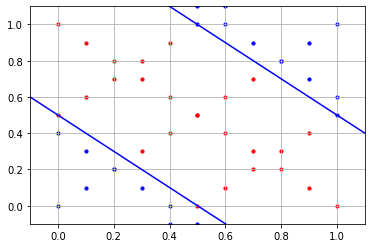

In [50]:
X = [(i/10, i/10) for i in range(11)]
X.extend([(i/10, (10-i)/10) for i in range(11)])
X.extend([(i/10, (10-i)/10 + 0.6) for i in range(11)])
X.extend([(i/10, (10-i)/10 - 0.6) for i in range(11)])
#X.extend([(i/10, i/10 + 0.2) for i in range(11)])
#X.extend([(i/10, i/10 - 0.2) for i in range(11)])
X.extend([(i/10, i/10 + 0.5) for i in range(11)])
X.extend([(i/10, i/10 - 0.5) for i in range(11)])
#print(X)
for x in X:
    out = nn.forward(torch.tensor(x))

    #print("out", out)

    if out >= 0.5:
        #print("Class C0")
        plt.scatter(x[0], x[1], s=10, c='red')

    else:
        #print("Class C1")
        plt.scatter(x[0], x[1], s=10, c='blue')

wf_x0 = [-2, -1, 0 , 1, 2]
wf_x1 = [-x0 + 0.5 for x0 in wf_x0]
plt.plot(wf_x0, wf_x1, c='blue')

wf_x0 = [-2, -1, 0 , 1, 2]
wf_x1 = [-x0 + 1.5 for x0 in wf_x0]
plt.plot(wf_x0, wf_x1, c='blue')

plt.grid(True)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])